# Boosting Explainability using SHAP

![](https://images.unsplash.com/photo-1494216928456-ae75fd96603d?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)


For information, the classes names are the following :
```python
y_names = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"
}
```

In [3]:
import numpy as np
import pandas as pd
import lightgbm as lgb

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [4]:
data = pd.read_csv('../input/X.csv')
data = data.iloc[:, 1:]

In [5]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3284,127,7,430,177,4213,233,235,135,1298,...,0,0,0,0,0,0,0,0,0,2
1,3144,164,9,212,4,2183,228,243,147,700,...,0,0,0,0,0,0,0,0,0,1
2,3357,84,6,591,66,2040,229,229,133,2812,...,0,0,0,0,0,0,1,0,0,2
3,3261,322,13,604,-12,655,186,226,180,3078,...,0,0,0,0,0,0,0,0,0,2
4,2975,175,13,30,0,992,227,246,149,882,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3075,163,18,300,60,1728,234,242,132,977,...,0,0,0,0,0,0,0,0,0,1
9996,2801,41,9,0,0,1981,221,219,132,1338,...,0,1,0,0,0,0,0,0,0,2
9997,3294,353,9,552,117,2610,204,224,158,2300,...,0,0,0,0,0,0,1,0,0,1
9998,3148,121,1,283,7,5792,221,237,152,870,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.2)

In [8]:
# TODO : boost
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [9]:
y_pred = lgbm.predict(X_test)

In [10]:
score = f1_score(y_test, y_pred, average='macro')
print(f'Model f1 score on test set: {score:.2%}')

Model f1 score on test set: 63.92%


#### Define the SHAP explainer

In [14]:
import shap
shap.initjs()

In [15]:
explainer = shap.TreeExplainer(lgbm)

#### Get the SHAP values object on the test dataset

In [16]:
shap_values = explainer.shap_values(X_test)

#### Let's analyze the feature importances, using the `feature_importances_` attribute of the model first, then using SHAP.

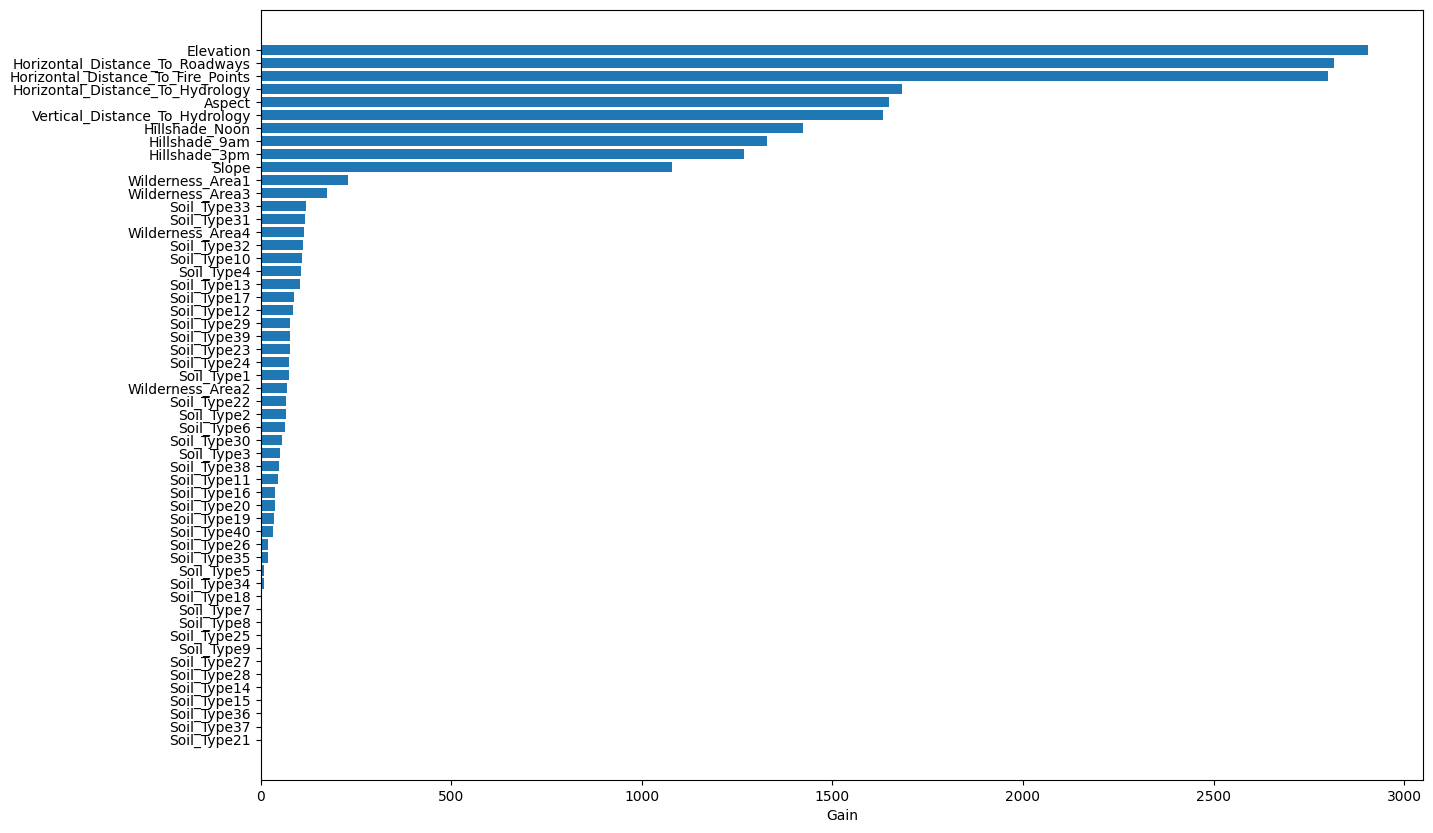

In [22]:
features = X.columns

indices = np.argsort(lgbm.feature_importances_)

plt.figure(figsize=(15, 10))
plt.barh(range(len(indices)), lgbm.feature_importances_[indices], align='center')
plt.xlabel("Gain")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

In [23]:
classes = ["Spruce/Fir",
           "Lodgepole Pine",
           "Ponderosa Pine",
           "Cottonwood/Willow",
           "Aspen",
           "Douglas-fir",
           "Krummholz"]

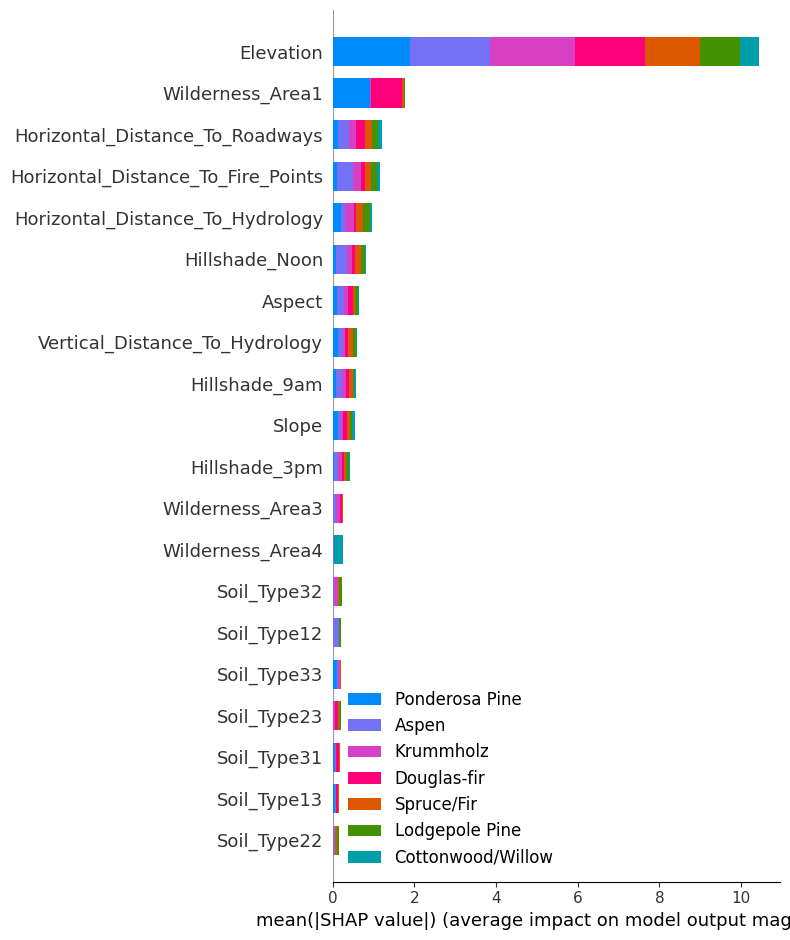

In [25]:
# Plot the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=features, class_names=classes, plot_type="bar")

#### For each class, let's plot the features importance (using the SHAP values) specific to it.

Spruce/Fir


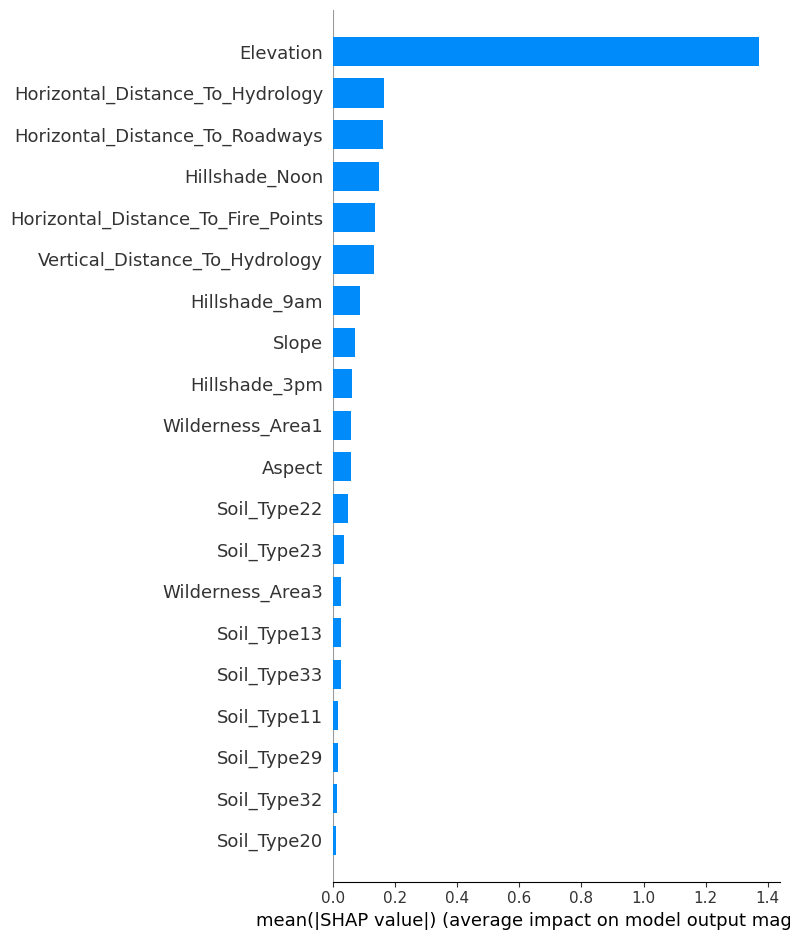

Lodgepole Pine


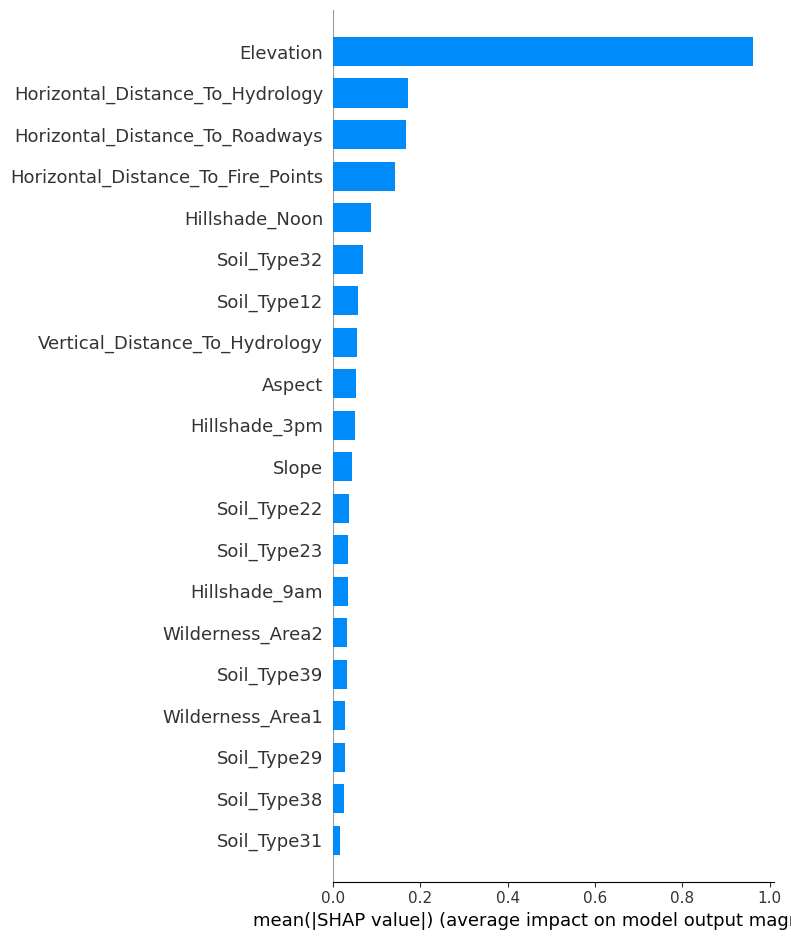

Ponderosa Pine


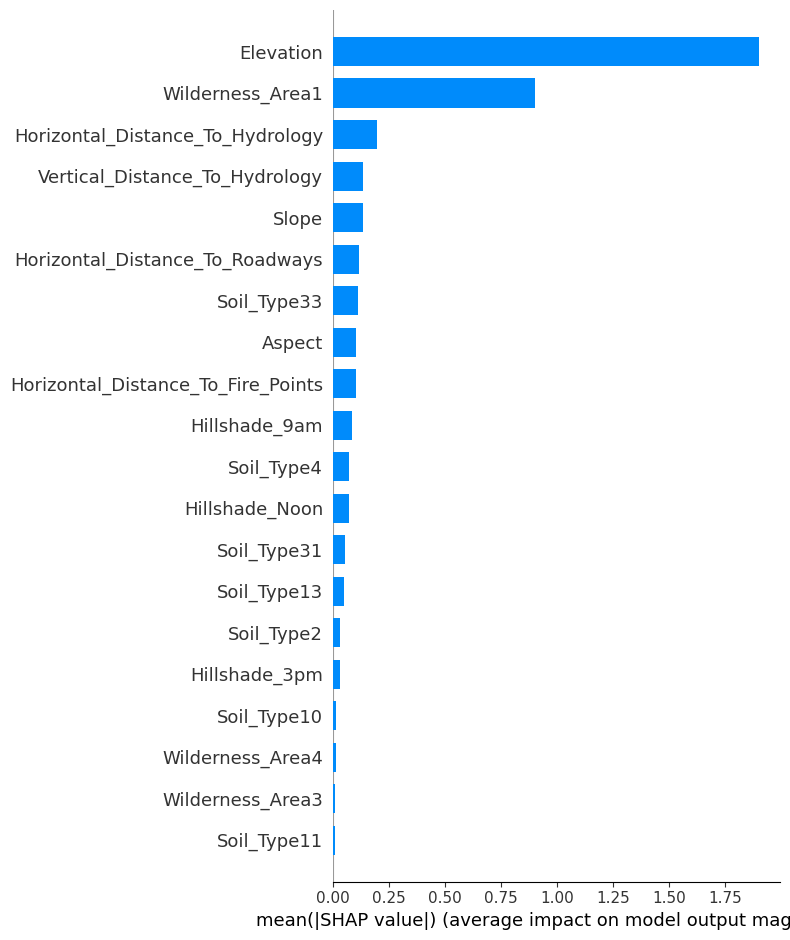

Cottonwood/Willow


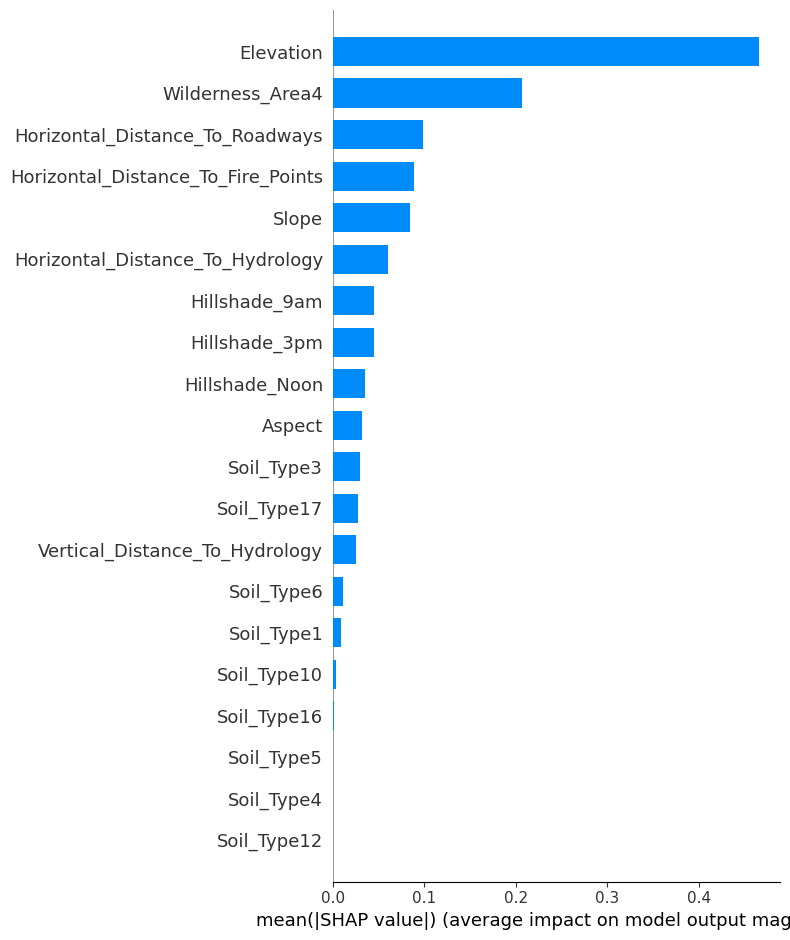

Aspen


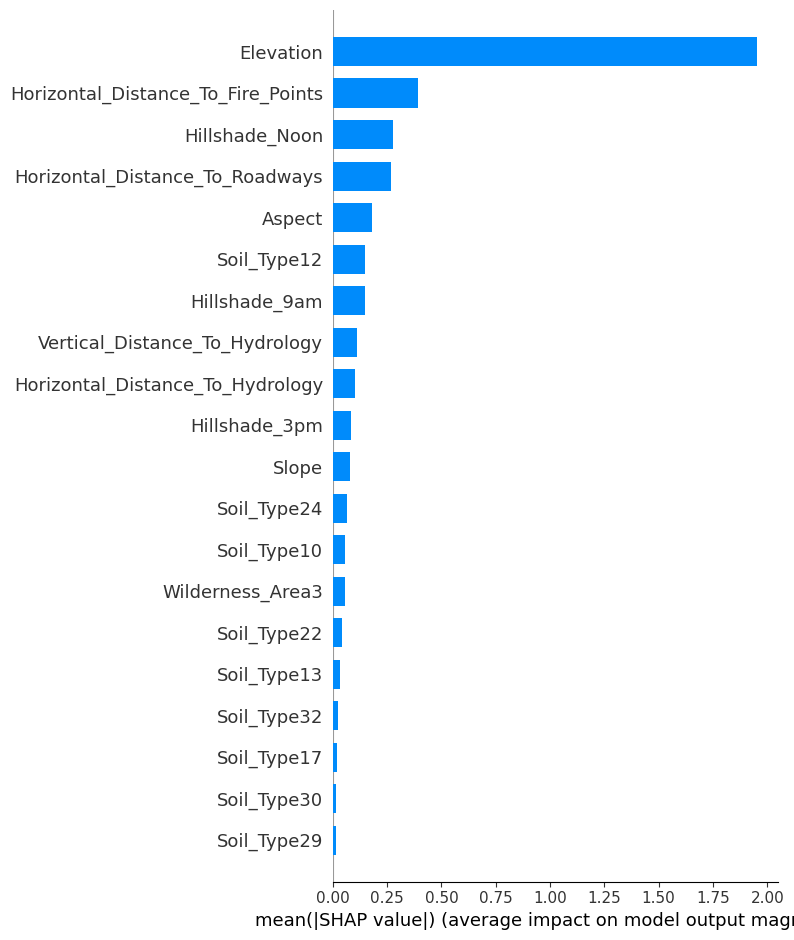

Douglas-fir


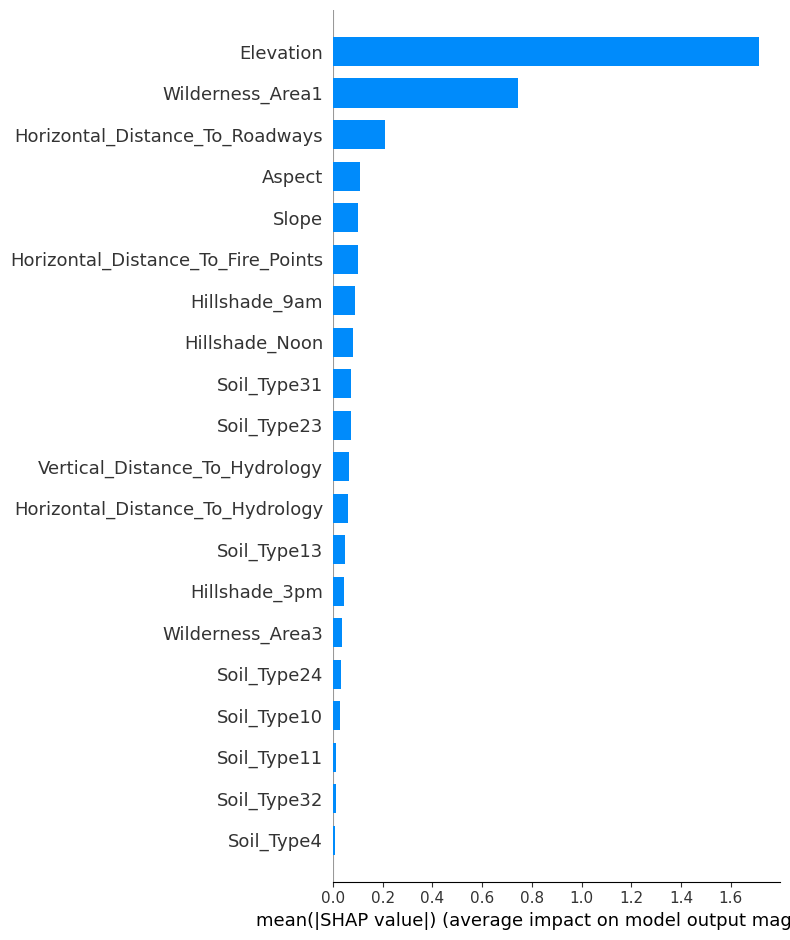

Krummholz


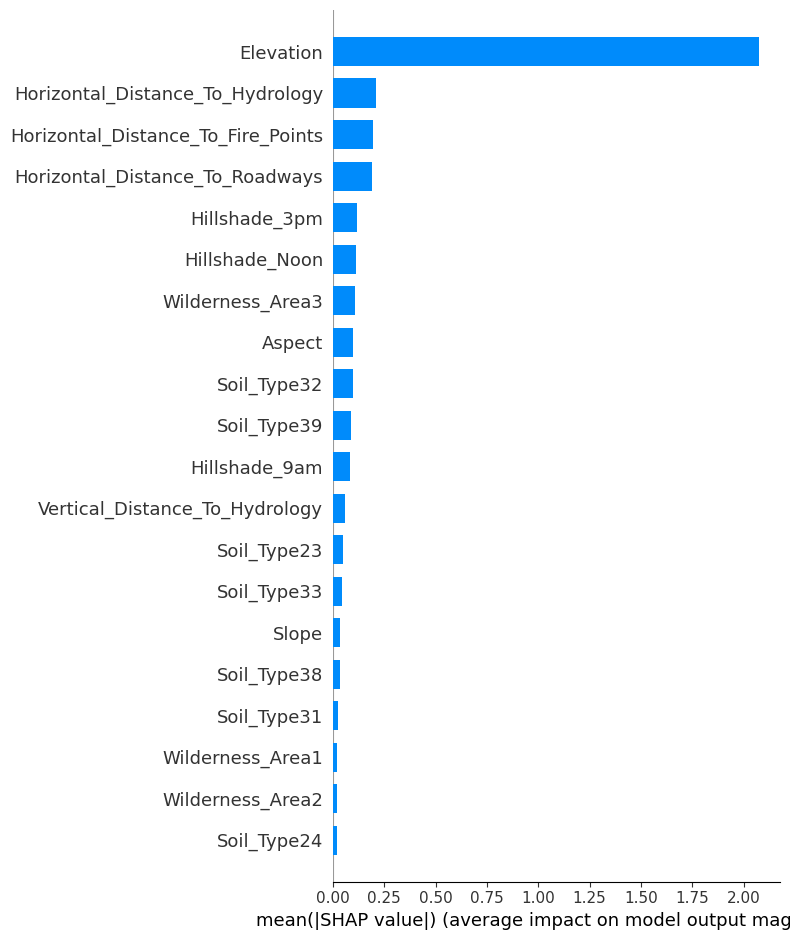

In [26]:
for i in range(len(shap_values)):
    print(classes[i])
    shap.summary_plot(shap_values[i], X_test, feature_names=features, class_names=classes[i], plot_type="bar", title = f'SHAP values for class {classes[i]}')

#### Let's see the features value variation impact for Krummholz and Aspen classes. 

Features value variation impact for class 'Krummholz'


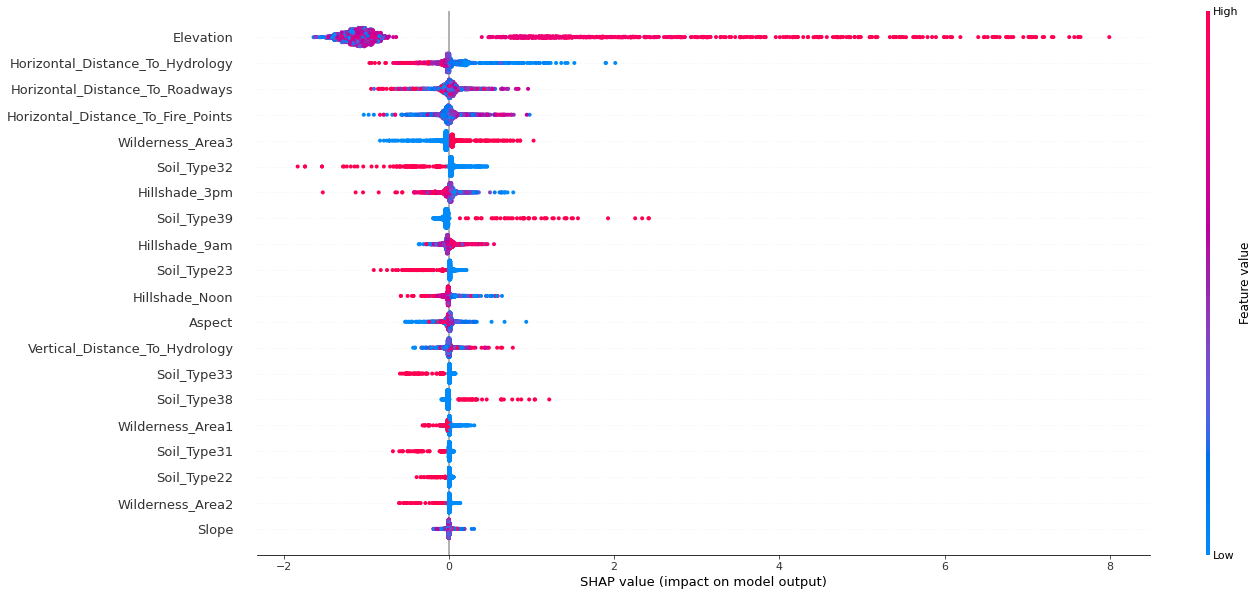

Features value variation impact for class 'Aspen'


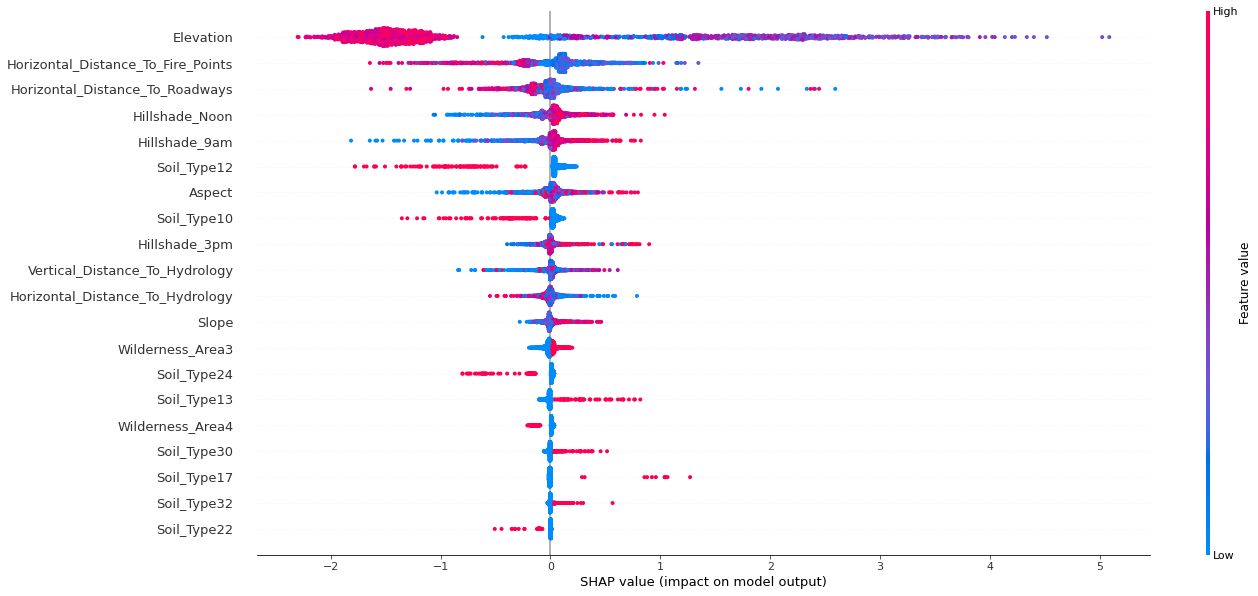

In [98]:
# TODO : features value variation for Krummholz
for name in ['Krummholz', 'Aspen']:
    print(f"Features value variation impact for class '{name}'")
    shap.summary_plot(shap_values[classes.index(name)], X_test, feature_names=features, plot_size=(20, 10))

#### Let's plot more precise variation impact for the 3 most important features for Aspen.

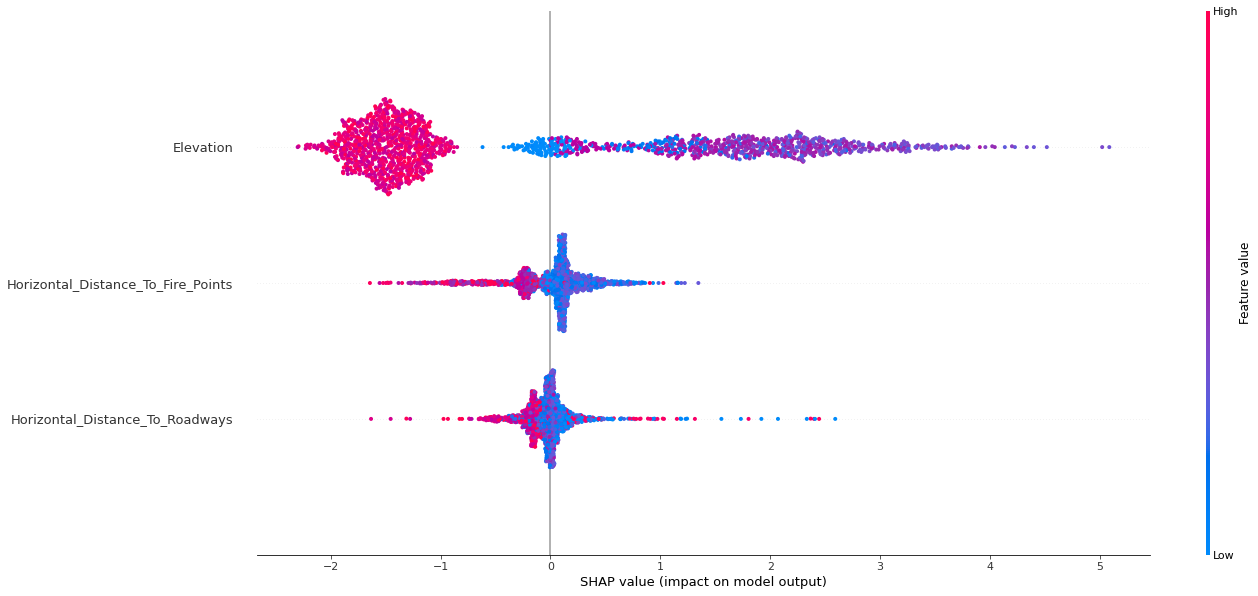

In [99]:
# Variation impact for the three most important features for Aspen
shap.summary_plot(shap_values[classes.index('Aspen')], X_test, max_display=3, feature_names=features, plot_size=(20, 10))